In [1]:
#Importo librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\nahue\AppData\Local\Temp\ipykernel_10752\4136200757.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                    HOMICIDIOS

In [2]:
#Leo el archivo de "homicidios"
homicidios = pd.read_excel("Data/homicidios.xlsx", sheet_name=None)

In [3]:
#Guardo cada pagina en una variable (las paginas importantes)
HECHOS_H = homicidios["HECHOS"]
VICTIMAS_H = homicidios["VICTIMAS"]


        HECHOS

In [4]:
HECHOS_H.head(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
#Quiero ver el tipo de datos
HECHOS_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [6]:
#Quiero ver los nulos
HECHOS_H.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [7]:
HECHOS_H.shape
#Al usar shape y ver la cantidad de nulos por columna me doy cuenta que 
#la columna "ALTURA" tiene demasiados Nan, decido eliminarla.

(696, 21)

In [8]:
#Elimino altura
HECHOS_H.drop(["Altura"], axis=1, inplace=True)

In [9]:
#Ver si en "N_VICTIMAS" tiene outliers
HECHOS_H["N_VICTIMAS"].unique()
#No tiene outliers, el numero de victimas es razonable

array([1, 2, 3], dtype=int64)

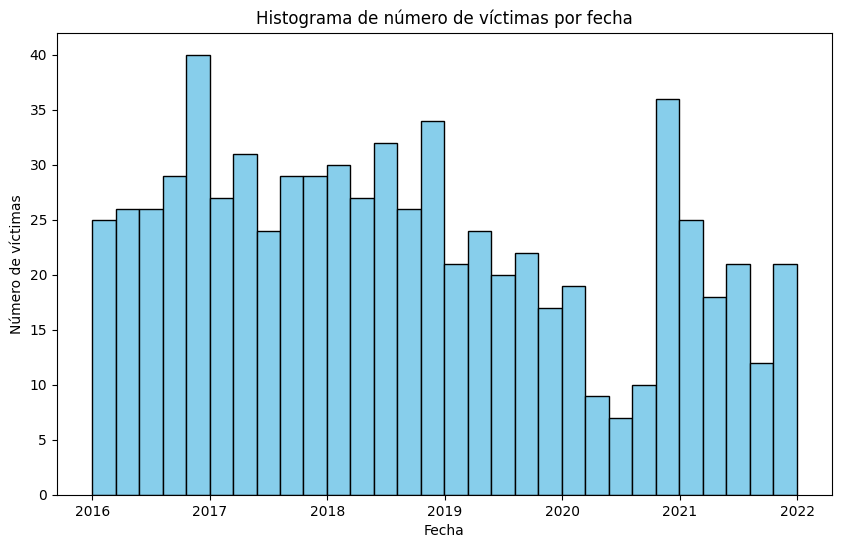

In [10]:
#Graficamente se puede ver que no hay outliers con las victimas(importante para un buen analisis)
plt.figure(figsize=(10, 6))
plt.hist(HECHOS_H['FECHA'], weights=HECHOS_H["N_VICTIMAS"], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de número de víctimas por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de víctimas')
plt.show()

In [11]:
#Valores duplicados
HECHOS_H.duplicated().any() #Me tira falso

False

In [27]:
#Guardar en .csv los cambios
HECHOS_H.to_csv("CSV/hechos_homicidios.csv", index=False)

                        VICTIMAS_H

In [14]:
#Vista general
VICTIMAS_H.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [15]:
VICTIMAS_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [16]:
VICTIMAS_H.shape

(717, 10)

In [17]:
#Me fijo el numero de Nan y todo en orden
VICTIMAS_H.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [18]:
#Valores duplicados
VICTIMAS_H.duplicated().any()#Me tira falso

False

In [19]:
VICTIMAS_H["EDAD"].unique() #Veo si hay algun valor extraño

array([19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20,
       54, 'SD', 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 42, 53, 51, 40,
       87, 76, 75, 35, 80, 43, 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39,
       28, 7, 48, 4, 82, 32, 17, 47, 61, 10, 95, 73, 84, 66, 85, 1, 15,
       13, 77, 44, 31, 62, 74, 71, 11, 86, 69, 72, 12, 63, 92, 68, 91, 64,
       5, 88], dtype=object)

In [20]:
#Cambio edad a un int
VICTIMAS_H["EDAD"] = pd.to_numeric(VICTIMAS_H["EDAD"], errors="coerce")

In [21]:
#Eliminar nulos
VICTIMAS_H.dropna(inplace=True)

In [22]:
VICTIMAS_H.info()

<class 'pandas.core.frame.DataFrame'>
Index: 664 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             664 non-null    object        
 1   FECHA                664 non-null    datetime64[ns]
 2   AAAA                 664 non-null    int64         
 3   MM                   664 non-null    int64         
 4   DD                   664 non-null    int64         
 5   ROL                  664 non-null    object        
 6   VICTIMA              664 non-null    object        
 7   SEXO                 664 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  664 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 57.1+ KB


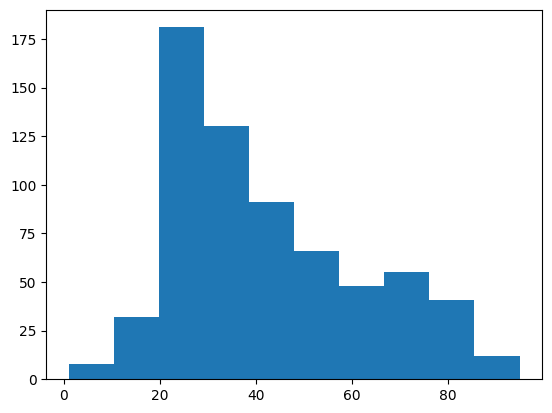

In [23]:
plt.hist(VICTIMAS_H["EDAD"])
plt.show()
#Las victimas son mayormente de 20 a 40 años

In [26]:
#Convertir a .csv para guardar los cambios
VICTIMAS_H.to_csv("CSV/victimas_homicidios.csv", index=False)

                                        LESIONES                   

In [28]:
#Leo el archivo de "lesiones"
lesiones = pd.read_excel("Data/lesiones.xlsx", sheet_name=None)

In [34]:
HECHOS_L=lesiones["HECHOS"]
HECHOS_L.head(5)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [35]:
HECHOS_L.info() #Tipos de datos y ver si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [36]:
HECHOS_L.isna().sum()
#Se puede ver que hay valores nulos, no los voy a tocar por ahora, amenos que lo necesite

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [38]:
#Valores duplicados
HECHOS_L.duplicated().any()

False

In [40]:
HECHOS_L.to_csv("CSV/hechos_lesiones.csv")

                                        VICTIMAS LESIONES

In [44]:
#Leo las victimas en el excel de "lesiones"
VICTIMAS_L = lesiones["VICTIMAS"]
VICTIMAS_L

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [48]:
VICTIMAS_L["GRAVEDAD"].unique()
#Veo que falta normalizacion pero decido dejarlo por si no lo necesito

array(['SD', 'sd', 'GRAVE', 'grave'], dtype=object)

In [49]:
#Todo bien porque los Nan son SD
VICTIMAS_L.isna().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

In [ ]:
VICTIMAS_L.to_csv("CSV/victimas_lesiones.csv", index=False)